In [6]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical
# Import all the libraries 
import os
import shutil
from PIL import Image, ImageOps  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
import plotly.graph_objects as go
import plotly.express as px
import datetime
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio
pio.templates.default = 'plotly_white'
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Concatenate, Flatten, MaxPooling2D, Conv2D
from  tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
channels=3
batch_size=25
test_batch_size=32 
test_steps=1
train_path = 'C:/Users/TANAY SALVE/Downloads/suyash/Alzheimer_Dataset/train'
test_path = 'C:/Users/TANAY SALVE/Downloads/suyash/Alzheimer_Dataset/test'
val_path = 'C:/Users/TANAY SALVE/Downloads/suyash/Alzheimer_Dataset/test'
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
def scalar(img):    
    return img  # EfficientNet expects pixelsin range 0 to 255 so no scaling is required
trgen=ImageDataGenerator(preprocessing_function=scalar, horizontal_flip=True)
tvgen=ImageDataGenerator(preprocessing_function=scalar)
train_generator=trgen.flow_from_directory( directory=train_path , target_size=(224,224), class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
test_generator=tvgen.flow_from_directory( directory=test_path, target_size=(224,224), class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)

valid_generator=tvgen.flow_from_directory( directory=val_path, target_size=(224,224), class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
classes=list(train_generator.class_indices.keys())
class_count=len(classes)
train_steps=int(np.ceil(len(train_generator.labels)/batch_size))

test batch size:  32   test steps:  1
Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [8]:
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=train_generator.image_shape))
model.add(MaxPool2D(2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Flatten())
model.add(Dense(512, activation='relu'))


model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 64)      

In [9]:
import keras
METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
    
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=METRICS)

In [10]:
Info = model.fit(
                 train_generator,
                 validation_data=valid_generator,
                 epochs=10,
                 )

Epoch 1/10
205/205 [==============================] - 253s 1s/step - loss: 1.3510 - accuracy: 0.4696 - precision: 0.4944 - recall: 0.1880 - val_loss: 1.1690 - val_accuracy: 0.5004 - val_precision: 0.5004 - val_recall: 0.5004
Epoch 2/10
205/205 [==============================] - 246s 1s/step - loss: 1.0070 - accuracy: 0.5095 - precision: 0.5975 - recall: 0.2681 - val_loss: 0.9884 - val_accuracy: 0.5223 - val_precision: 0.5917 - val_recall: 0.4590
Epoch 3/10
205/205 [==============================] - 248s 1s/step - loss: 0.9022 - accuracy: 0.5558 - precision: 0.6813 - recall: 0.3449 - val_loss: 1.0521 - val_accuracy: 0.4277 - val_precision: 0.4711 - val_recall: 0.2995
Epoch 4/10
205/205 [==============================] - 253s 1s/step - loss: 0.8588 - accuracy: 0.5913 - precision: 0.6816 - recall: 0.4189 - val_loss: 0.9427 - val_accuracy: 0.5715 - val_precision: 0.7014 - val_recall: 0.3526
Epoch 5/10
205/205 [==============================] - 253s 1s/step - loss: 0.7953 - accuracy: 0.6225

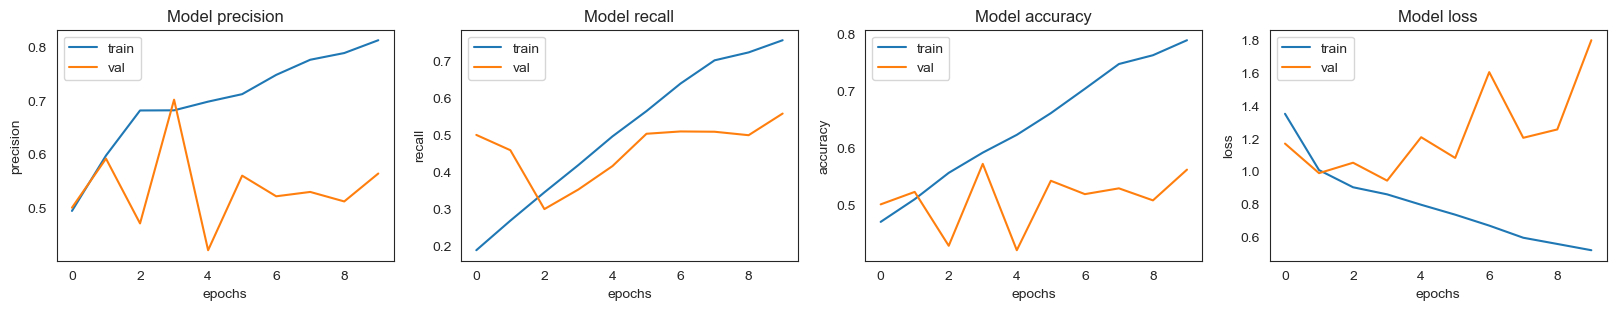

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(Info.history[met])
    ax[i].plot(Info.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [12]:
predictions = model.predict(test_generator)

diseases_labels = []

for key, value in train_generator.class_indices.items():
    diseases_labels.append(key)

40/40 [==============================] - 14s 345ms/step


In [13]:
from sklearn.metrics import precision_recall_fscore_support

def evaluate(actual, predictions):
    pre = []
    for i in predictions:
        pre.append(np.argmax(i))
    accuracy = (pre == actual).sum() / actual.shape[0]
    print(f'Accuracy: {accuracy}')
    precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1_score: {f1_score}')
    fig, ax = plt.subplots(figsize=(5,5))
    conf_mat = confusion_matrix(actual, pre)
    sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
    plt.show()

Accuracy: 0.5613760750586395
Precision: 0.27079299544419133
Recall: 0.3131138392857143
F1_score: 0.2872425547517836


C:\Users\TANAY SALVE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



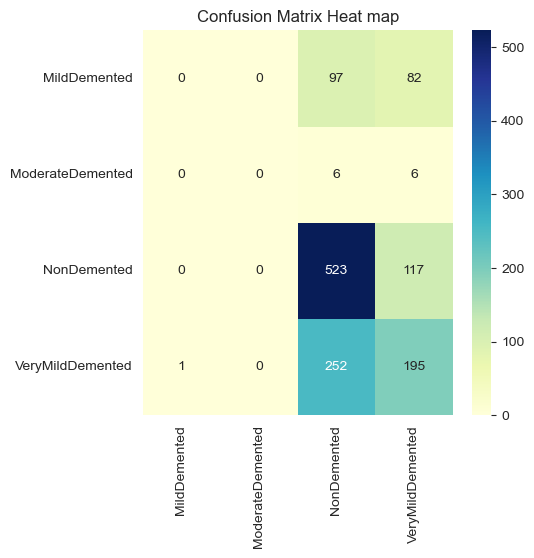

In [14]:
evaluate(test_generator.classes,predictions)

In [15]:
model.evaluate(test_generator)

40/40 [==============================] - 14s 337ms/step - loss: 1.8005 - accuracy: 0.5614 - precision: 0.5640 - recall: 0.5582


[1.8005352020263672,
 0.5613760948181152,
 0.5639810562133789,
 0.5582486391067505]

In [16]:
model.save("cnn.h5")

In [18]:
from keras.utils import img_to_array

def preprocess_img(img_path):
    op_img = Image.open(img_path)
    img_resize = op_img.resize((224, 224), refcheck=False)
    img2arr = img_to_array(img_resize) / 255.0
    img_reshape = img2arr.reshape(1, 224, 224, 3)
    return img_reshape

def predict_result(predict):
    pred = model.predict(predict)
    return np.argmax(pred[0], axis=-1)

In [19]:
def print_result(img):
    p = predict_result(img)
    if p == 0:
        print("Person is suffering from Very Mild Demented ")
    elif p == 1:
        print("Person is suffering from Non Demented ")
    elif p == 2:
        print("Person is suffering from Moderate Demented ")
    elif p == 3:
        print("Person is suffering from Mild Demented ")
    return 0

In [21]:
IMG_SIZE = 224
import cv2
img_array = cv2.imread(r'C:/Users/TANAY SALVE/Downloads/suyash/Alzheimer_Dataset/test/MildDemented/32.jpg')
img_array = cv2.cvtColor(img_array ,cv2.COLOR_BGR2RGB)
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(print_result(img))

1/1 [==============================] - 0s 149ms/step
Person is suffering from Mild Demented 
0
